In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Excels\\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


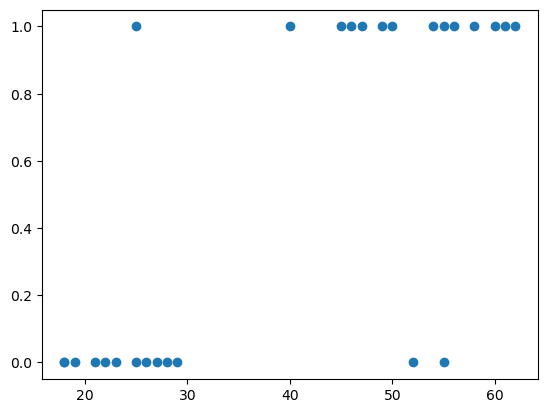

In [4]:
plt.scatter(df['age'],df['bought_insurance'])
# works good for logisitc Regression ( looks like an S  )

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['age']]
y = df['bought_insurance']
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size=0.1)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression().fit(X_train,y_train)

In [9]:
X_test # the column that we test on

,age
24,50
15,55
9,61


In [10]:
clf.predict(X_test) # if high age = 1 , so it seems to be working

array([1, 1, 1], dtype=int64)

In [11]:
clf.score(X_test,y_test) # 1 = is perfect (not realistic)

1.0

In [12]:
clf.predict_proba(X_test) # proba = probility

array([[0.21639218, 0.78360782],
       [0.12832889, 0.87167111],
       [0.06472972, 0.93527028]])

In [13]:
# Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention 
# (i.e. whether they leave the company or continue to work)
# Plot bar charts showing impact of employee salaries on retention
# Plot bar charts showing corelation between department and employee retention
# Now build logistic regression model using variables that were narrowed down in step 1
# Measure the accuracy of the model

In [14]:
df = pd.read_csv("Excels\\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df_numeric = df.drop(['Department','salary'],axis='columns')
df_numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [16]:
left = df[df['left']==1]
left.shape

(3571, 10)

In [36]:
# Average numbers for all columns
df_numeric.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [18]:
# From above table we can draw following conclusions,

# **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
# **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
# **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

(array([0, 1, 2]),
 [Text(0, 0, 'high'), Text(1, 0, 'low'), Text(2, 0, 'medium')])

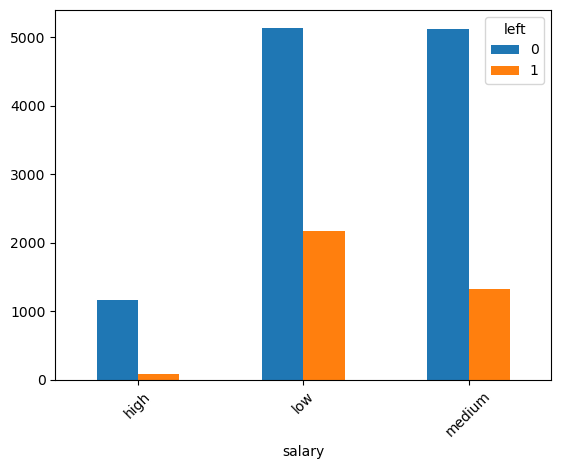

In [19]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')
plt.xticks(rotation=45)

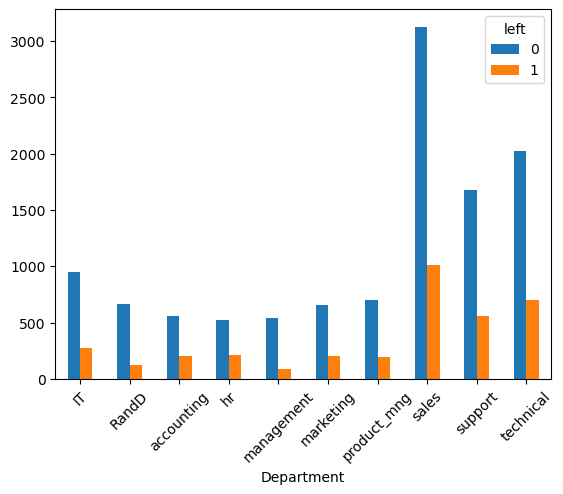

In [20]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [21]:
# This is our X(independent Variables) ( Features )
# **Satisfaction Level**
# **Average Monthly Hours**
# **Promotion Last 5 Years**
# **Salary**

In [22]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [24]:
dummies = pd.get_dummies(subdf['salary'])
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [25]:
finaldf = pd.concat([subdf,dummies],axis='columns')
finaldf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [26]:
finaldf = finaldf.drop(['salary','low'],axis='columns')

In [27]:
finaldf

,satisfaction_level,average_montly_hours,promotion_last_5years,high,medium
0,0.38,157,0,False,False
1,0.80,262,0,False,True
2,0.11,272,0,False,True
3,0.72,223,0,False,False
4,0.37,159,0,False,False
...,...,...,...,...,...
14994,0.40,151,0,False,False
14995,0.37,160,0,False,False
14996,0.37,143,0,False,False
14997,0.11,280,0,False,False


In [28]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [29]:
X = finaldf
y = df['left']
X_train , X_test , y_train,y_test = train_test_split(X,y,train_size=0.3)

In [30]:
clf = LogisticRegression().fit(X_train,y_train)

In [31]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,medium
7298,0.94,118,0,False,True
8618,0.81,202,0,False,True
3514,0.52,192,0,False,False
929,0.83,243,0,False,True
7425,0.60,144,0,False,False
...,...,...,...,...,...
3276,0.93,212,0,False,True
14253,0.40,127,0,False,False
6305,0.88,233,0,False,False
12623,0.36,146,0,False,True


In [32]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
clf.predict_proba(X_test)

array([[0.9462604 , 0.0537396 ],
       [0.90330168, 0.09669832],
       [0.66742297, 0.33257703],
       ...,
       [0.88235493, 0.11764507],
       [0.64430208, 0.35569792],
       [0.92733761, 0.07266239]])

In [34]:
clf.score(X_test,y_test)

0.7728571428571429